DC, for the Employment data analysis Please do the Data preparatin as following:
 
Get the following fields from the CICdata
 
customer_id, TIN, run_date, occupationdesc, occupationstatusdesc, TradeName, employment_duration_in_days (DateHiredTo or run_date - DateHiredFrom), PSICdesc, AnnualMonthlyIndicator, Currency, GrossIncome, max_sanctioned_amt_24m, max_creditcard_limit_24m, max_financed_amt_24m, tot_granted_contracts_cnt_24m, tot_granted_contracts_amt_12m, max_sanctioned_amt_12m, Max_CreditCard_limit_12m, max_financed_amt_12m, tot_granted_contracts_cnt_12m, tot_granted_contracts_amt_12m
 
Get the self declared employment details, application_date,  and MaxSalary information from our internal Salary scaling table using the CustomerID or TIN and application_date = run_date
 
Get the gender, age, region, province of the customer from demographic table using customer_id or TIN and application_date = run_date
 
Get the following fields from the Credolab tables using the customer_id or mobile number and application_date = run date:
Device Price
Device Manufacturer (Apple/ Samsung/ Oppo etc.)
Device Model
Device Age (usually derived by the application_date - earliest apps installation date)
number of job search apps installed (linkedin, jobstreet, glint etc.)
number of professional apps installed (office, gdrive etc)
number of ecommerce apps installed (lazada, shopee, shein, zalora, temu etc.)
number of ride hailing apps installed (grab, moveit etc.)
number of finance apps installed (Banking apps, FinTech apps, eWallet apps)
number of Risky apps (gambling apps, crypto apps, payday loan apps)
number of OTT apps (Netflix, PrimeVideo etc.)
Sowndarya: may be you can share your earlier apps categorisation work with DC for this. To keep things simple, just give him your final app categorisation mapping.

# <div align="center" style="color: #C64242;">**Employement Data with CredoLab Data For Income Estimation**</div>

## <div style="color: #D9534F;"> Declaring the library </div>

In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')
import re
from fuzzywuzzy import process
# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

c:\Users\DwaipayanChakroborti\Myenv\reporting\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## <div style="color: #C64242;"> Combining Granted and Non Granted Contract tables </div>

In [3]:
sq = """
WITH
  CICBaseTable AS ( -- Query FOR dfgranted
  SELECT
    digitalLoanAccountId,
    crifApplicationId,
    customerId,
    processEngineGuid,
    requestGuid,
    ContractHistoryType,
    CBContractCode,
    ContractEndDate,
    ContractPhase,
    ContractPhaseDesc,
    ContractStartDate,
    ContractStatus,
    ContractStatusDesc,
    ContractType,
    ContractTypeDesc,
    Currency,
    CurrencyDesc,
    LastUpdateDate,
    OriginalCurrency,
    OriginalCurrencyDesc,
    ProviderCodeEncrypted,
    ProviderContractNo,
    ReferenceNo,
    Role,
    RoleDesc,
    BilledAmount,
    BoardResolutionFlag,
    BoardResolutionFlagDesc,
    CancellationDate,
    CardReferenceCode,
    ChargedAmount,
    CreditLimit,
    CreditPurpose,
    CreditPurposeDesc,
    FinancedAmount,
    FirstPaymentDate,
    FlagCardUsed,
    HolderLiability,
    HolderLiabilityDesc,
    InstallmentType,
    InstallmentTypeDesc,
    InstallmentsNumber,
    LastChargeDate,
    LastPaymentAmount,
    LastPaymentDate,
    MinPaymentIndicator,
    MinPaymentIndicatorDesc,
    MinPaymentPercentage,
    MonthlyPaymentAmount,
    NextPayment,
    NextPaymentDate,
    OutstandingBalance,
    OutstandingBalanceUnbilled,
    OutstandingPaymentsNumber,
    OverallCreditLimit,
    OverdueDays,
    OverdueDaysDesc,
    OverduePaymentsAmount,
    OverduePaymentsNumber,
    PaymentMethod,
    PaymentMethodDesc,
    PaymentPeriodicity,
    PaymentPeriodicityDesc,
    PremiumCard,
    PremiumCardDesc,
    ReorganizedCreditCode,
    ReorganizedCreditCodeDesc,
    ServicesLinesNo,
    TimesCardUsed,
    TransactionType,
    TransactionTypeDesc,
    Utilization,
    LinkedSubject_CBSubjectCode,
    LinkedSubject_Name,
    LinkedSubject_Role,
    LinkedSubject_RoleDesc,
    Note_TypeDesc,
    Note_Text,
    Note_Type,
    run_date,
    NULL AS ContractRequestDate,
    'granted' AS SOURCE
  FROM
    prj-prod-dataplatform.risk_credit_cic_data.granted_contracts
  UNION ALL
    -- Query FOR dfnongranted
  SELECT
    digitalLoanAccountId,
    crifApplicationId,
    customerId,
    processEngineGuid,
    requestGuid,
    NULL AS ContractHistoryType,
    CBContractCode,
    NULL AS ContractEndDate,
    ContractPhase,
    ContractPhaseDesc,
    NULL AS ContractStartDate,
    NULL AS ContractStatus,
    NULL AS ContractStatusDesc,
    ContractType,
    ContractTypeDesc,
    NULL AS Currency,
    NULL AS CurrencyDesc,
    LastUpdateDate,
    NULL AS OriginalCurrency,
    NULL AS OriginalCurrencyDesc,
    ProviderCodeEncrypted,
    ProviderContractNo,
    ReferenceNo,
    Role,
    RoleDesc,
    NULL AS BilledAmount,
    NULL AS BoardResolutionFlag,
    NULL AS BoardResolutionFlagDesc,
    NULL AS CancellationDate,
    NULL AS CardReferenceCode,
    NULL AS ChargedAmount,
    CreditLimit,
    NULL AS CreditPurpose,
    NULL AS CreditPurposeDesc,
    FinancedAmount,
    NULL AS FirstPaymentDate,
    NULL AS FlagCardUsed,
    NULL AS HolderLiability,
    NULL AS HolderLiabilityDesc,
    NULL AS InstallmentType,
    NULL AS InstallmentTypeDesc,
    InstallmentsNumber,
    NULL AS LastChargeDate,
    NULL AS LastPaymentAmount,
    NULL AS LastPaymentDate,
    NULL AS MinPaymentIndicator,
    NULL AS MinPaymentIndicatorDesc,
    NULL AS MinPaymentPercentage,
    MonthlyPaymentAmount,
    NULL AS NextPayment,
    NULL AS NextPaymentDate,
    NULL AS OutstandingBalance,
    NULL AS OutstandingBalanceUnbilled,
    NULL AS OutstandingPaymentsNumber,
    NULL AS OverallCreditLimit,
    NULL AS OverdueDays,
    NULL AS OverdueDaysDesc,
    NULL AS OverduePaymentsAmount,
    NULL AS OverduePaymentsNumber,
    NULL AS PaymentMethod,
    NULL AS PaymentMethodDesc,
    PaymentPeriodicity,
    PaymentPeriodicityDesc,
    NULL AS PremiumCard,
    NULL AS PremiumCardDesc,
    NULL AS ReorganizedCreditCode,
    NULL AS ReorganizedCreditCodeDesc,
    NULL AS ServicesLinesNo,
    NULL AS TimesCardUsed,
    NULL AS TransactionType,
    NULL AS TransactionTypeDesc,
    NULL AS Utilization,
    LinkedSubject_CBSubjectCode,
    LinkedSubject_Name,
    LinkedSubject_Role,
    LinkedSubject_RoleDesc,
    Note_TypeDesc,
    Note_Text,
    Note_Type,
    run_date,
    ContractRequestDate,
    'nongranted' AS SOURCE
  FROM
    prj-prod-dataplatform.risk_credit_cic_data.notgranted_contracts )
select distinct * from CICBaseTable;
"""

dfrawdata = client.query(sq).to_dataframe(progress_bar_type='tqdm')


Job ID 3d4ca4fa-722a-4aa0-8763-52b8e0b91b4b successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [4]:
dfrawdata.shape

(1539402, 82)

In [6]:
dfrawdata.to_csv(r'C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\IncomeEstimation\Data\cicgrantednongranted.csv', index = False)

In [5]:
sq = """
select PSIC, PSICDesc, AnnualMonthlyIndicator,  max(GrossIncome) maxgrossincome FROM  prj-prod-dataplatform.risk_credit_cic_data.employment_data group by 1, 2, 3;
"""

df = client.query(sq).to_dataframe(progress_bar_type='tqdm')

Job ID c569e3fb-2934-4e45-81f8-e6f2d3fad959 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [7]:
pd.set_option("Display.max_rows", None)
df

,PSIC,PSICDesc,AnnualMonthlyIndicator,maxgrossincome
0,01111,01111 - Growing of leguminous crops such as: m...,None,80000
1,822,822 - Call centers and other related activities,M,96000
2,99019,99019 - International organizations and extra-...,None,None
3,81299,81299 - Other building and industrial cleaning...,None,None
4,651,651 - Insurance,Y,410000
5,84119,84119 - General public administration activiti...,Y,861911
6,103,103 - Processing and preserving of fruits and ...,None,None
7,10303,10303 - Manufacture of fruit and vegetable sau...,None,40000
8,85211,85211 - Public primary/elementary education,Y,0
9,12010,12010 - Manufacture of cigarettes,Y,350000


In [8]:
df.to_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\IncomeEstimation\Data\PSICDesc unique.csv", index = False)

In [9]:
def clean_psic_desc(text):
    if pd.isna(text):
        return text
    text = str(text)  # Convert to string
    return re.sub(r'^\d+\s*-\s*', '', text)

In [10]:
# Apply the function to create a new column
df['CleanedPSICDesc'] = df['PSICDesc'].apply(clean_psic_desc)

# Display the first few rows to verify the result
df

,PSIC,PSICDesc,AnnualMonthlyIndicator,maxgrossincome,CleanedPSICDesc
0,01111,01111 - Growing of leguminous crops such as: m...,None,80000,"Growing of leguminous crops such as: mongo, st..."
1,822,822 - Call centers and other related activities,M,96000,Call centers and other related activities
2,99019,99019 - International organizations and extra-...,None,None,International organizations and extra-territor...
3,81299,81299 - Other building and industrial cleaning...,None,None,Other building and industrial cleaning activit...
4,651,651 - Insurance,Y,410000,Insurance
5,84119,84119 - General public administration activiti...,Y,861911,"General public administration activities, n.e.c."
6,103,103 - Processing and preserving of fruits and ...,None,None,Processing and preserving of fruits and vegeta...
7,10303,10303 - Manufacture of fruit and vegetable sau...,None,40000,Manufacture of fruit and vegetable sauces (e.g...
8,85211,85211 - Public primary/elementary education,Y,0,Public primary/elementary education
9,12010,12010 - Manufacture of cigarettes,Y,350000,Manufacture of cigarettes


In [11]:
df.to_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\IncomeEstimation\Data\PSICDesc_desc.csv", index = False)

In [12]:
sq = """select * from prj-prod-dataplatform.dl_loans_db_raw.tdbk_loans_occupation_mtb;"""

dfoccupation = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID 10216d98-5925-485b-928c-f6ad87326aec successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [13]:
dfoccupation.shape

(197, 7)

In [14]:
dfoccupation.to_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\IncomeEstimation\Data\occupation.csv", index = False)

In [15]:
def fuzzy_match(x, choices, cutoff=80):
    match = process.extractOne(x, choices)
    return match[0] if match and match[1] >= cutoff else None

def clean_text(text):
    if pd.isna(text):
        return ''
    return ' '.join(word.lower() for word in str(text).split() if word.isalnum())

def fuzzy_join_dataframes(df1, df2, col1, col2, cutoff=80):
    # Clean the text in both columns
    df1['clean_col'] = df1[col1].apply(clean_text)
    df2['clean_col'] = df2[col2].apply(clean_text)
    
    # Remove empty strings after cleaning
    df1 = df1[df1['clean_col'] != '']
    df2 = df2[df2['clean_col'] != '']
    
    # Create a dictionary of cleaned descriptions to original descriptions
    desc_dict = dict(zip(df2['clean_col'], df2[col2]))
    
    # Perform fuzzy matching
    df1['matched_desc'] = df1['clean_col'].apply(lambda x: fuzzy_match(x, desc_dict.keys(), cutoff))
    
    # Map back to original descriptions
    df1['matched_desc'] = df1['matched_desc'].map(lambda x: desc_dict.get(x, x))
    
    # Merge the dataframes
    result = pd.merge(df1, df2, left_on='matched_desc', right_on=col2, how='left')
    
    # Clean up intermediate columns
    columns_to_drop = ['clean_col', 'matched_desc']
    result = result.drop(columns=[col for col in columns_to_drop if col in result.columns], axis=1)
    
    return result

In [16]:
# Perform the fuzzy join
result = fuzzy_join_dataframes(dfoccupation, df, 'name', 'CleanedPSICDesc', cutoff=80)

In [17]:
a = result[['name','PSICDesc', 'CleanedPSICDesc']].value_counts(dropna=False)
a.to_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\IncomeEstimation\Data\uniquevaluesnameandpsidesc.csv")

In [18]:
result.columns

Index(['id', 'name', 'createdBy', 'status', 'createdDt', 'updatedBy',
       'updatedDt', 'clean_col_x', 'PSIC', 'PSICDesc',
       'AnnualMonthlyIndicator', 'maxgrossincome', 'CleanedPSICDesc',
       'clean_col_y'],
      dtype='object')

In [19]:
result.to_csv(r"C:\Users\DwaipayanChakroborti\OneDrive - Tonik Financial Pte Ltd\MyStuff\Biswa\IncomeEstimation\Data\joineddata_fuzzymatch80.csv", index = False)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def clean_text(text):
    if pd.isna(text):
        return ''
    return ' '.join(word.lower() for word in str(text).split() if word.isalnum())

def cosine_similarity_match(x, choices, vectorizer, cutoff=0.5):
    x_vector = vectorizer.transform([x])
    similarities = cosine_similarity(x_vector, choices)
    best_match_index = similarities.argmax()
    if similarities[0][best_match_index] >= cutoff:
        return list(vectorizer.vocabulary_.keys())[best_match_index]
    return None

def cosine_similarity_join_dataframes(df1, df2, col1, col2, cutoff=0.5):
    # Clean the text in both columns
    df1['clean_col'] = df1[col1].apply(clean_text)
    df2['clean_col'] = df2[col2].apply(clean_text)
    
    # Remove empty strings after cleaning
    df1 = df1[df1['clean_col'] != '']
    df2 = df2[df2['clean_col'] != '']
    
    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    df2_vectors = vectorizer.fit_transform(df2['clean_col'])
    
    # Create a dictionary of cleaned descriptions to original descriptions
    desc_dict = dict(zip(df2['clean_col'], df2[col2]))
    
    # Perform cosine similarity matching
    df1['matched_desc'] = df1['clean_col'].apply(lambda x: cosine_similarity_match(x, df2_vectors, vectorizer, cutoff))
    
    # Map back to original descriptions
    df1['matched_desc'] = df1['matched_desc'].map(lambda x: desc_dict.get(x, x))
    
    # Merge the dataframes
    result = pd.merge(df1, df2, left_on='matched_desc', right_on=col2, how='left')
    
    # Clean up intermediate columns
    columns_to_drop = ['clean_col', 'matched_desc']
    result = result.drop(columns=[col for col in columns_to_drop if col in result.columns], axis=1)
    
    return result

Query is running:   0%|          |


In [22]:
# Perform the cosine similarity join
result = cosine_similarity_join_dataframes(dfoccupation, df, 'name', 'CleanedPSICDesc', cutoff=0.5)

In [23]:
a = result[['name','PSICDesc', 'CleanedPSICDesc']].value_counts(dropna=False)
a

name                                                                                                        PSICDesc  CleanedPSICDesc
Accountants (including Auditors)                                                                            NaN       NaN                1
Personnel and Careers Professionals                                                                         NaN       NaN                1
Pharmacist                                                                                                  NaN       NaN                1
Physiotherapist (Physical Therapist)                                                                        NaN       NaN                1
Physiotherapy Technicians and Assistants                                                                    NaN       NaN                1
Plastic Products Machine Operators                                                                          NaN       NaN                1
Plumbers and Pipe Fitters       

## <div style="color: #C64242; font-family: Monotype Corsiva;"><b> Main Query Part </b> </div>

In [24]:
sq ="""# Loan Master 
with loanmaster as 
(select distinct customerId, digitalLoanAccountId, loanAccountNumber, startApplyDateTime, natureofwork,industryDescription, incomeMultiple, employmentstatus,credolabScore,city,
       barangay, province, postalCode, age, monthlyIncome,  tinNumber, gender, dateOfBirth, email, mobileNo,firstName, middleName, lastName, custLoanJourneyZipCode,
       custLoanJourneyProvince, custLoanJourneyCity,  tsa_onboarding_time,new_loan_type
 from prj-prod-dataplatform.risk_credit_mis.loan_master_table),
employmentdata as 
(SELECT distinct 
  digitalLoanAccountId,
  crifApplicationId,
  customerId,
  coalesce(AnnualMonthlyIndicator, 'NA') AnnualMonthlyIndicator,
  coalesce(DateHiredFrom, format_date('%Y-%m-%d', current_date())) DateHiredFrom,
  DateHiredTo,
  GrossIncome,
  Occupation,
  OccupationDesc,
  OccupationStatus,
  OccupationStatusDesc,
  TIN,
  PhoneNumber,
  PSIC,
  PSICDesc
FROM  prj-prod-dataplatform.risk_credit_cic_data.employment_data)
select 
lm.customerId, lm.digitalLoanAccountId, loanAccountNumber,
       startApplyDateTime, natureofwork, industryDescription,
       incomeMultiple, employmentstatus, credolabScore, city,
       barangay, province, postalCode, age, monthlyIncome,
       tinNumber, gender, dateOfBirth, email, mobileNo, firstName,
       middleName, lastName, custLoanJourneyZipCode,
       custLoanJourneyProvince, custLoanJourneyCity, tsa_onboarding_time,
       new_loan_type, ed.digitalLoanAccountId edprimarykey, crifApplicationId,
       AnnualMonthlyIndicator, DateHiredFrom,
       DateHiredTo, GrossIncome, Occupation, OccupationDesc,
       OccupationStatus, OccupationStatusDesc, TIN, PhoneNumber,
       PSIC, PSICDesc
from loanmaster lm 
left join employmentdata ed on ed.digitalLoanAccountId = lm.digitalLoanAccountId"""

df = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID aa47c10b-c1a5-401c-9d44-5d1b1c45361f successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [25]:
df.shape

(1578089, 42)

In [26]:
df.columns

Index(['customerId', 'digitalLoanAccountId', 'loanAccountNumber',
       'startApplyDateTime', 'natureofwork', 'industryDescription',
       'incomeMultiple', 'employmentstatus', 'credolabScore', 'city',
       'barangay', 'province', 'postalCode', 'age', 'monthlyIncome',
       'tinNumber', 'gender', 'dateOfBirth', 'email', 'mobileNo', 'firstName',
       'middleName', 'lastName', 'custLoanJourneyZipCode',
       'custLoanJourneyProvince', 'custLoanJourneyCity', 'tsa_onboarding_time',
       'new_loan_type', 'edprimarykey', 'crifApplicationId',
       'AnnualMonthlyIndicator', 'DateHiredFrom', 'DateHiredTo', 'GrossIncome',
       'Occupation', 'OccupationDesc', 'OccupationStatus',
       'OccupationStatusDesc', 'TIN', 'PhoneNumber', 'PSIC', 'PSICDesc'],
      dtype='object')

In [27]:
pd.set_option("Display.max_columns", None)
df.sample(10)

,customerId,digitalLoanAccountId,loanAccountNumber,startApplyDateTime,natureofwork,industryDescription,incomeMultiple,employmentstatus,credolabScore,city,barangay,province,postalCode,age,monthlyIncome,tinNumber,gender,dateOfBirth,email,mobileNo,firstName,middleName,lastName,custLoanJourneyZipCode,custLoanJourneyProvince,custLoanJourneyCity,tsa_onboarding_time,new_loan_type,edprimarykey,crifApplicationId,AnnualMonthlyIndicator,DateHiredFrom,DateHiredTo,GrossIncome,Occupation,OccupationDesc,OccupationStatus,OccupationStatusDesc,TIN,PhoneNumber,PSIC,PSICDesc
1262721,2175122,6aaeaa22-30b9-416c-aab4-4c892d394629,None,NaT,Owner,None,NaN,BUSINESS OWNER/SOLE PROPRIETOR,451.0,CITY OF MARIKINA,PARANG,METRO MANILA,1809,23,None,None,F,26 Jul 2001,Abiengg.ramirez26@gmail.com,639763747935,ABIGAIL,RAMIREZ,ALBA,None,None,None,2023-08-06 08:46:17,Quick,None,None,None,None,None,None,None,None,None,None,None,None,None,None
607398,2251445,39cfe25c-9144-45dd-a9ea-01f55afdb56e,None,2023-09-28 15:08:58,Govt Employee,Government Institution,NaN,SALARIED,458.0,TRECE MARTIRES CITY,GREGORIO ALIANG,Cavite,4109,26,34000,770504645,M,16 Jan 1998,mpjbssarcol07@gmail.com,639705877927,MARK PHIL JOHN,BANAAG,SARCOL,4109,CAVITE,TRECE MARTIRES CITY,2023-09-28 15:06:05,SIL-Instore,39cfe25c-9144-45dd-a9ea-01f55afdb56e,tonik-bnpl-353869,NA,2024-08-02,None,None,None,None,None,None,None,None,None,None
136432,1862151,f0e13d1d-bfc9-4c64-912e-d81595926d52,None,2023-01-15 09:13:58,Other Professional services,Financial Services,NaN,SALARIED,463.0,BATANGAS CITY,BALETE,Batangas,4200,31,15000,433345030,M,03 May 1993,franciscorowell511@gmail.com,639922530910,ROWELL,VILLANUEVA,FRANCISCO,4200,BATANGAS,BATANGAS CITY,2023-01-15 08:44:57,Flex,f0e13d1d-bfc9-4c64-912e-d81595926d52,tonik-sbcl-202048,NA,2024-08-02,None,None,None,None,None,None,None,028-334-2677,None,None
479014,1927513,35b57d69-f65e-4fae-874e-84c6c848a937,60819275130029,2023-10-14 14:54:11,Other Professional services,Services,0.43,SALARIED,485.0,CITY OF MARIKINA,NANGKA,METRO MANILA,1808,40,25000,765145612,M,12 Dec 1983,santosronnel242@gmail.com,639663266469,RONNEL,DIMATIRA,SANTOS,1808,METRO MANILA,CITY OF MARIKINA,2023-03-04 12:26:48,SIL-Instore,None,None,None,None,None,None,None,None,None,None,None,None,None,None
257462,2247094,dbf7d279-8ae4-4a6e-9a1c-47c4b46952fc,None,NaT,Admin/Secretarial,None,NaN,OVERSEAS FILIPINO WORKER,None,IMUS,BUHAY NA TUBIG,Cavite,4103,39,None,None,M,01 Sep 1984,joshcart0901@gmail.com,639567040599,ERNESTO,TOLOSA,CARTAGENA,None,None,None,2023-09-25 09:04:20,Flex,None,None,None,None,None,None,None,None,None,None,None,None,None,None
112295,2621503,9f0803a5-860b-4d87-b5a5-db2e48a28188,60826215030014,2024-06-30 11:16:12,None,Trading,1.04,SELF EMPLOYED,457.0,SANTA ANA,SAN BARTOLOME,Pampanga,2022,53,15000,911367866,M,03 Jul 1971,renatomadrigalejos77@gmail.com,639353035611,RENATO,SERDENA,MADRIGALEJOS,2022,PAMPANGA,SANTA ANA,2024-06-30 11:14:32,SIL-Instore,9f0803a5-860b-4d87-b5a5-db2e48a28188,taran-2621503-7849566,NA,2024-08-02,None,None,None,None,None,None,None,None,None,None
333948,1494726,da52f4a2-dcd2-4d82-b07d-62a335c471ff,None,NaT,Cashier/Food Server/Waiter,None,NaN,SALARIED,552.0,BACOOR,HABAY II,Cavite,4102,22,None,None,F,31 Aug 2001,madianisidro329@gmail.com,639923702533,MADIAN,TADEO,ISIDRO,None,None,None,2022-07-26 16:45:35,Quick,None,None,None,None,None,None,None,None,None,None,None,None,None,None
225918,1889587,9f513a24-aa69-42ce-8d62-b57ac6ca672c,None,NaT,Store/Service Manager,None,NaN,SALARIED,430.0,PINTUYAN,SANTA CRUZ,Southern Leyte,6614,25,None,None,F,27 May 1999,mhaerejano@gmail.com,639267019656,MAE CAH,SACLAG,REJANO,None,None,None,2023-02-07 00:24:15,Quick,None,None,None,None,None,None,None,None,None,None,None,None,None,None
398018,1928658,b2910a3a-baed-4b1a-84bc-c9c3402d19c0,None,NaT,IT Professional,None,NaN,SALARIED,None,ZAMBOANGUITA,POBLACION,Negros oriental,6218,23,19000,None,M,28 Jun 2001,sean.elnar28@gmail.com,639695939876,SEAN LHESTER,ALABADO,ELNAR,None,None,None,2023-03-05 08:37:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578089 entries, 0 to 1578088
Data columns (total 42 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   customerId               1577280 non-null  Int64         
 1   digitalLoanAccountId     1578089 non-null  object        
 2   loanAccountNumber        167652 non-null   object        
 3   startApplyDateTime       1296778 non-null  datetime64[us]
 4   natureofwork             1349704 non-null  object        
 5   industryDescription      1172573 non-null  object        
 6   incomeMultiple           221167 non-null   float64       
 7   employmentstatus         1576351 non-null  object        
 8   credolabScore            1322214 non-null  object        
 9   city                     1576774 non-null  object        
 10  barangay                 1576760 non-null  object        
 11  province                 1576760 non-null  object        
 12  

In [29]:
sq = """
Select  t1.customerId,loan.LOANSTATUS,loan.LOANSTARTDATE
FROM
`prj-prod-dataplatform.risk_credit_mis.loan_master_table` t1
LEFT JOIN
`prj-prod-dataplatform.dl_loans_db_raw.tdbk_digital_loan_application` t2
ON t1.digitalLoanAccountId = t2.digitalLoanAccountId
LEFT JOIN
`prj-prod-dataplatform.dl_loans_db_raw.tdbk_credolab_track` t3
ON t2.credolabRefNumber = t3.refno
LEFT JOIN
`prj-prod-dataplatform.credolab_raw.android_credolab_datasets_struct_columns` t4
ON t3.refno = t4.deviceId
inner join
`prj-prod-dataplatform.core_raw.loan_accounts` loan
on loan.CUSTOMERID = t1.customerId
 INNER JOIN
(select deviceId, af.package_name as package_name from `prj-prod-dataplatform.credolab_raw.android_credolab_Application`  ,
unnest(Application) as af) ca
ON ca.deviceId = t3.refno
where
loan.product <>'WriteoffOffBal' and loan._partitiondate='2024-03-17' qualify row_number()over(partition by loan.CUSTOMERID order by loan.LOANSTARTDATE desc) =1;
"""

df_loan = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID d7294941-7a80-4b10-9a29-6046960e331a successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [30]:
sq = """Select  DISTINCT t1.customerId,t3.crodolabDeviceId, ca.package_name
FROM
`prj-prod-dataplatform.risk_credit_mis.loan_master_table` t1
LEFT JOIN
`prj-prod-dataplatform.dl_loans_db_raw.tdbk_digital_loan_application` t2
ON t1.digitalLoanAccountId = t2.digitalLoanAccountId
LEFT JOIN
`prj-prod-dataplatform.dl_loans_db_raw.tdbk_credolab_track` t3
ON t2.credolabRefNumber = t3.refno
LEFT JOIN
`prj-prod-dataplatform.credolab_raw.android_credolab_datasets_struct_columns` t4
ON t3.refno = t4.deviceId
inner join
`prj-prod-dataplatform.core_raw.loan_accounts` loan
on loan.CUSTOMERID = t1.customerId
 INNER JOIN
(select deviceId, af.package_name as package_name, af.first_install_time as first_install_time from `prj-prod-dataplatform.credolab_raw.android_credolab_Application`  ,
unnest(Application) as af) ca
ON ca.deviceId = t3.refno;"""

df_risk_table_2  = client.query(sq).to_dataframe(progress_bar_type = 'tqdm')

Job ID 91fc6dcf-6449-40ed-ba93-307306287975 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


In [31]:
df_risk_table_2.head()

,customerId,crodolabDeviceId,package_name
0,2021240,6e437603f4e785fd33471f6ee4243e79,com.maypera.peso
1,2162759,e2697e361ce41b749de9cca1122f059d,com.google.android.apps.wellbeing
2,2229861,1bf1a675724eb2e35b97b406dd3a95d5,com.android.dreams.phototable
3,2542855,08c0b66feaa21e6779bec6cf778cca74,com.macrovideo.v380pro
4,2294490,896337baa2bb22ad721c148fac88b957,com.example.alpha.chipsemitptest


In [32]:
data =    {"category" :['social_media',"social_media","social_media","social_media",'social_media',"social_media",
                        "social_media",'social_media',"social_media","social_media","social_media",'social_media',
                        "social_media","social_media","social_media","social_media",'social_media',"social_media",
                        "social_media","social_media",'social_media',"social_media","social_media",'social_media',
                        "social_media",'social_media',"social_media","social_media","social_media",'social_media',
                        "social_media","social_media",'social_media',"social_media",'social_media',"social_media",
                        "social_media",'social_media',
                        "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle", "Health & lifestyle","Health & lifestyle",
                        "Health & lifestyle",  "Health & lifestyle","Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle", 
                       "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",
                       "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",
                        
                        "ecommerce","ecommerce","ecommerce","ecommerce",'ecommerce',"ecommerce","ecommerce","ecommerce","ecommerce",'ecommerce',
                        "ecommerce","ecommerce","ecommerce","ecommerce",'ecommerce', "ecommerce","ecommerce","ecommerce","ecommerce",'ecommerce',
                        
                        'productivity','productivity','productivity','productivity', 'productivity',
                        'productivity','productivity','productivity','productivity','productivity',
                        'productivity','productivity','productivity','productivity','productivity',
                        'productivity','productivity','productivity','productivity', 'productivity',
                        'productivity','productivity','productivity','productivity','productivity',
                        
                        "travel","travel","travel","travel","travel","travel","travel","travel","travel","travel",
                        "travel","travel","travel","travel","travel","travel","travel","travel","travel",
                        "VPN","VPN", "VPN","VPN","VPN","VPN","VPN","VPN","VPN",
                        
                         "finance","finance","finance","finance","finance","finance","finance","finance","finance","finance",
                        "finance","finance","finance","finance","finance","finance","finance","finance","finance","finance",
                       "finance","finance","finance","finance","finance","finance","finance","finance","finance","finance",
                        
                        "games",'games','games','games','games','games','games','games','games','games',"games",'games',
                        'games','games','games','games','games','games','games','games',"games",'games','games','games',
                        'games','games','games','games','games','games','games','games','games','games',
                        
                        "News","News", "News","News","News","News","News","News","News","News",
                        "News","News", "News","News","News","News","News","News","News","News","News",
                        
                        "Podcast", "Podcast", "Podcast", "Podcast", "Podcast", "Podcast", "Podcast", "Podcast","Podcast", "Podcast",
                         "Podcast", "Podcast", "Podcast", "Podcast", "Podcast", "Podcast", "Podcast", "Podcast","Podcast", "Podcast",
                        "Entertainment","Entertainment","Entertainment","Entertainment","Entertainment","Entertainment","Entertainment","Entertainment",
                        "Entertainment","Entertainment","Entertainment","Entertainment","Entertainment","Entertainment","Entertainment","Entertainment"

                     
                       ],
                       
          "apps" :["messanger","facebook","viber","instagram","lite","facebooklite","Telegram","Discord","Pinterest",
                   "bilibili","reddit","Twitter","linkedin", 'Instagram', 'Twitter', 'LinkedIn', 'Snapchat',
                   'TikTok', 'Pinterest', 'WhatsApp', 'Reddit', 'YouTube', 'Tumblr', 'Skype', 
                   'WeChat', 'LINE', 'Viber', 'Signal', 'Twitch', 'VKontakte', 'Weibo', 'Clubhouse', 
                   'Flickr', 'Quora', 'Badoo', 'Meetup', 'KakaoTalk', 'VK',
                   
                   'MyFitnessPal', 'Calm', 'Headspace', 'Fitbit', 'NikeTrainingClub', 'LoseIt', 'Strava', 'Yoga Studio', 
                   'DailyYoga', 'MapMyRun', '7MinuteWorkout', 'PeriodTracker', 'WaterDrinkReminder',
                    'SleepCycle', 'GoodRx', 'Zombies', 'Fooducate', 'Sweatcoin', 'Habitica',
                   
                  'Shopee', 'Lazada', 'Zalora', 'Zilingo', 'Amazon', 'eBay', 'AliExpress', 'Wish', 'Tokopedia', 'JD.com', 
                   'Walmart', 'Flipkart', 'Alibaba', 'Rakuten', 'Taobao', 'Snapdeal', 'MercadoLibre', 'Daraz', 'Olx', 'Etsy',
                   
                   'googlecanlender','googledrive','samsungcalender','samsungnotes','openai','chatgpt','googledocs',
                'camsoftinformation','googlesheets','wps','notes','camscanner','microsoft','googlesheets','Adobe',
                'Alarm','onedrive','Notisave','calculator','notepad','pdfreader','pdf','filemanger','calender','outlook',
                   
                   'Booking', 'Airbnb', 'Uber', 'Lyft', 'GoogleMaps', 'GoogleEarth', 'TripAdvisor', 'Expedia', 
                   'KAYAK', 'Skyscanner', 'Agoda', 'Hopper', 'Trivago', 'TripIt', 'Traveloka', 'Priceline', 'Orbitz', 'Waze', 'Rome2rio',
                   
                   "NordVPN","SurfShark", "Express","cyberghost","IPVanish","Private Internet Access",
                   "Mullvad","Proton", "Atlas",
                   
                   "Gcash","BPI","Metrobank","iWant","PayMaya","wallet","mocamoca","moca","wise","trust","mrcash",
                   "PayMaya","Coins", "BPI","UnionBank", "CIMB", "Security Bank","BDO","Metrobank","Robinsons",
                    "LANDBANK", "EastWest","PNB", "PSBank", "Maybank2U","Citibank","RCBC", "AXA", "SunLife","AUB",
                   
                   'mobilelegends', 'freefireth', 'spacemafia', 'clashofclans', 'ig', 'shooter', 'bh3global', 'romg', 
                   'gp', 'GenshinImpact', 'fortnite', 'n9', 'clashroyale', 'subwaysurf', 'gardenscapes', 'homescapes', 
                   'candycrushsaga', 'eightballpool', 'mobilehero', 'common', 'legends', 'freefireth', 'spacemafia', 
                   'clashofclans', 'ig', 'shooter', 'romg', 'GenshinImpact', "game","gamecenter",
                   "battle","survival","mcpe","tycoon",
                   
                   'Google News', 'BBC News', 'CNN', 'The New York Times', 'The Guardian', 'Reuters', 'Al Jazeera', 
                   'Fox News', 'NPR News', 'ABC News', 'NBC News', 'Bloomberg', 'CBS News', 'Yahoo News', 'Washington Post', 
                   'HuffPost', 'Associated Press', 'BBC Sport', 'Sky News', 'ESPN', "News",
                   
                   'Spotify', 'Apple Podcasts', 'Google Podcasts', 'Stitcher', 'Podbean', 'TuneIn', 'Pocket Casts', 'Overcast',
                   'Castbox', 'Deezer', 'iHeartRadio', 'RadioPublic', 'Acast', 'Podcast Addict', 'Player FM', 'Breaker', 'SoundCloud', 
                   'Anchor', 'Audible', 'Podyssey',
                   
                   "Netflix", "loklok", "Mivideo", "Youtube", "viu", "Niki", "Disney", "shorttv", "Amazonprime", 
                   "Dramabox", "vivamax", "steam", "Hitv", "HBO", "HDmovies", "smartlivestream"


                  ]}
                
df = pd.DataFrame(data)
df['apps'] = df['apps'].str.lower()
df = df.drop_duplicates(keep='last')
len(df)

234

In [33]:
def extract_last_word(text):
    parts = text.split('.') 
    return parts[-1]  

df_risk_table_2["apps"] = df_risk_table_2["package_name"].apply(extract_last_word)

df_risk_table_2.head()

,customerId,crodolabDeviceId,package_name,apps
0,2021240,6e437603f4e785fd33471f6ee4243e79,com.maypera.peso,peso
1,2162759,e2697e361ce41b749de9cca1122f059d,com.google.android.apps.wellbeing,wellbeing
2,2229861,1bf1a675724eb2e35b97b406dd3a95d5,com.android.dreams.phototable,phototable
3,2542855,08c0b66feaa21e6779bec6cf778cca74,com.macrovideo.v380pro,v380pro
4,2294490,896337baa2bb22ad721c148fac88b957,com.example.alpha.chipsemitptest,chipsemitptest


In [34]:
df_cat_merged = df_risk_table_2.merge(df,on=['apps'], how ='left')
# df_cat_merged.head(2)
# df_risk_table_2 = df_risk_table_1
# def find_near_match(row):
#     app = row['package_name']
#     for index, df1_row in df.iterrows():
#         pattern = re.compile(rf".*{df1_row['apps']}.*", re.IGNORECASE)
#         if re.match(pattern, app):
#             return df1_row['category']
#     return None

# df_risk_table_2['category'] = df_risk_table_2.apply(find_near_match, axis=1)

In [35]:
df_cat_merged['category'].value_counts()

category
games                 318931
social_media          200738
productivity          159900
Entertainment         109679
finance                76679
travel                 34940
VPN                    34647
Health & lifestyle      4265
ecommerce               1357
News                     511
Podcast                   55
Name: count, dtype: int64

In [36]:
finance= df_cat_merged[df_cat_merged['category'] == 'finance']
finance_ =finance.groupby(['customerId', 'category']).size().reset_index(name='Finance_count')
finance_ = finance_[['customerId','Finance_count']]

games= df_cat_merged[df_cat_merged['category'] == 'games']
games_ =games.groupby(['customerId', 'category']).size().reset_index(name='games_count')
games_ = games_[['customerId','games_count']]

social_media= df_cat_merged[df_cat_merged['category'] == 'social_media']
social_media_ =social_media.groupby(['customerId', 'category']).size().reset_index(name='Social_count')
social_media_ = social_media_[['customerId','Social_count']]

productivity= df_cat_merged[df_cat_merged['category'] == 'productivity']
productivity_ =productivity.groupby(['customerId', 'category']).size().reset_index(name='productivity_count')
productivity_ = productivity_[['customerId','productivity_count']]

Entertainment= df_cat_merged[df_cat_merged['category'] == 'Entertainment']
Entertainment_ = Entertainment.groupby(['customerId', 'category']).size().reset_index(name='Entertainment_count')
Entertainment_ = Entertainment_[['customerId','Entertainment_count']]


In [37]:
VPN= df_cat_merged[df_cat_merged['category'] == 'VPN']
VPN_ = VPN.groupby(['customerId', 'category']).size().reset_index(name='VPN_count')
VPN_ = VPN_[['customerId','VPN_count']]

travel= df_cat_merged[df_cat_merged['category'] == 'travel']
travel_ =travel.groupby(['customerId', 'category']).size().reset_index(name='travel_count')
travel_ = travel_[['customerId','travel_count']]

health = df_cat_merged[df_cat_merged['category'] == 'Health & lifestyle']
health_ =health.groupby(['customerId', 'category']).size().reset_index(name='health_count')
health_ = health_[['customerId','health_count']]

ecommerce= df_cat_merged[df_cat_merged['category'] == 'ecommerce']
ecommerce_ =ecommerce.groupby(['customerId', 'category']).size().reset_index(name='ecommerce_count')
ecommerce_ = ecommerce_[['customerId','ecommerce_count']]

News= df_cat_merged[df_cat_merged['category'] == 'News']
News_ = News.groupby(['customerId', 'category']).size().reset_index(name='News_count')
News_ = News_[['customerId','News_count']]

Podcast = df_cat_merged[df_cat_merged['category'] == 'Podcast']
Podcast_ = Podcast.groupby(['customerId', 'category']).size().reset_index(name='Podcast_count')
Podcast_ = Podcast_[['customerId','Podcast_count']]

In [38]:
df_merged = finance_.merge(games_, on=['customerId'],how='outer')
df_merged1 = social_media_.merge(productivity_, on=['customerId'],how='outer')
df_merged2 = Entertainment_.merge(VPN_, on=['customerId'],how='outer')
df_merged3 = travel_.merge(health_, on=['customerId'],how='outer')
df_merged4 = ecommerce_.merge(News_, on=['customerId'],how='outer')
df_merged5 = df_merged.merge(Podcast_, on=['customerId'],how='outer')
df_merged6 = df_merged5.merge(df_merged1, on=['customerId'],how='outer')

df_merged7 = df_merged6.merge(df_merged2, on=['customerId'],how='outer')
df_merged8 = df_merged7.merge(df_merged3, on=['customerId'],how='outer')
df_merged9 = df_merged8.merge(df_merged4, on=['customerId'],how='outer')

In [39]:
df_merged9.head()

,customerId,Finance_count,games_count,Podcast_count,Social_count,productivity_count,Entertainment_count,VPN_count,travel_count,health_count,ecommerce_count,News_count
0,1000192,2.0,6.0,NaN,2.0,2.0,3.0,NaN,2.0,NaN,NaN,NaN
1,1000243,1.0,NaN,NaN,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN
2,1000488,2.0,2.0,NaN,3.0,2.0,1.0,NaN,2.0,1.0,NaN,NaN
3,1000543,2.0,9.0,NaN,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN
4,1000605,3.0,4.0,NaN,5.0,4.0,2.0,2.0,1.0,NaN,NaN,NaN


In [40]:
df_merged9 = df_merged9.fillna(0)
df_merged9[['Finance_count', 'games_count', 'Podcast_count','Social_count', 'productivity_count', 'Entertainment_count','VPN_count', 'travel_count', 'health_count', 'ecommerce_count','News_count']] = df_merged9[['Finance_count', 'games_count', 'Podcast_count','Social_count', 'productivity_count', 'Entertainment_count','VPN_count', 'travel_count', 'health_count', 'ecommerce_count','News_count']].astype(int)
df_merged9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97055 entries, 0 to 97054
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   customerId           97055 non-null  Int64
 1   Finance_count        97055 non-null  int32
 2   games_count          97055 non-null  int32
 3   Podcast_count        97055 non-null  int32
 4   Social_count         97055 non-null  int32
 5   productivity_count   97055 non-null  int32
 6   Entertainment_count  97055 non-null  int32
 7   VPN_count            97055 non-null  int32
 8   travel_count         97055 non-null  int32
 9   health_count         97055 non-null  int32
 10  ecommerce_count      97055 non-null  int32
 11  News_count           97055 non-null  int32
dtypes: Int64(1), int32(11)
memory usage: 4.9 MB


In [41]:
df_merged9.columns

Index(['customerId', 'Finance_count', 'games_count', 'Podcast_count',
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count'],
      dtype='object')

In [42]:
df_merged9.sample(10)

,customerId,Finance_count,games_count,Podcast_count,Social_count,productivity_count,Entertainment_count,VPN_count,travel_count,health_count,ecommerce_count,News_count
39760,2332181,1,2,0,1,1,1,0,1,0,0,0
80108,2584659,1,3,0,2,2,1,0,0,0,0,0
15628,2038125,0,0,0,1,1,1,0,0,0,0,0
91276,2667661,1,10,0,2,1,1,1,2,0,0,0
26810,2230610,1,2,0,5,2,1,0,1,0,0,0
89885,2658495,1,1,0,1,1,1,1,0,0,0,0
77077,2562801,1,10,0,4,1,2,1,2,0,0,0
28176,2246025,0,1,0,3,2,1,0,2,0,0,0
31581,2279216,0,9,0,3,2,2,1,1,0,0,0
20822,2144697,0,0,0,1,0,1,0,0,0,0,0


In [44]:
df_loan_risk_merge  = df_merged9.merge(df_loan, on = ['customerId'], how = 'inner')
df_loan_risk_merge.head()

,customerId,Finance_count,games_count,Podcast_count,Social_count,productivity_count,Entertainment_count,VPN_count,travel_count,health_count,ecommerce_count,News_count,LOANSTATUS,LOANSTARTDATE
0,1000192,2,6,0,2,2,3,0,2,0,0,0,Settled,2023-04-29
1,1000243,1,0,0,2,3,1,0,1,0,0,0,Normal,2023-05-24
2,1000488,2,2,0,3,2,1,0,2,1,0,0,Completed,2021-07-14
3,1000543,2,9,0,2,2,1,1,1,0,0,0,Completed,2023-07-16
4,1000605,3,4,0,5,4,2,2,1,0,0,0,Settled,2022-12-29


In [45]:
print(len(df_risk_table_2))
print(len(df_loan))
print(len(df_merged9))
print(len(df_loan_risk_merge))

29740756
52827
97055
52783


In [46]:
df_loan.head(1)

,customerId,LOANSTATUS,LOANSTARTDATE
0,1027275,Normal,2023-03-07


In [47]:
df_loan_risk_merge.head()

,customerId,Finance_count,games_count,Podcast_count,Social_count,productivity_count,Entertainment_count,VPN_count,travel_count,health_count,ecommerce_count,News_count,LOANSTATUS,LOANSTARTDATE
0,1000192,2,6,0,2,2,3,0,2,0,0,0,Settled,2023-04-29
1,1000243,1,0,0,2,3,1,0,1,0,0,0,Normal,2023-05-24
2,1000488,2,2,0,3,2,1,0,2,1,0,0,Completed,2021-07-14
3,1000543,2,9,0,2,2,1,1,1,0,0,0,Completed,2023-07-16
4,1000605,3,4,0,5,4,2,2,1,0,0,0,Settled,2022-12-29


In [48]:
df_loan_risk_merge['good_vs_bad_loans'] = np.where(df_loan_risk_merge['LOANSTATUS'] == 'Normal', 'Good loans',np.where(df_loan_risk_merge['LOANSTATUS'] == 'Settled', 'Good loans',np.where(df_loan_risk_merge['LOANSTATUS'] == 'Completed', 'Good loans',np.where(df_loan_risk_merge['LOANSTATUS'] == 'In Arrears', 'Bad loans',np.where(df_loan_risk_merge['LOANSTATUS'] == 'Written Off', 'Bad loans',df_loan_risk_merge['LOANSTATUS']) ))))

In [49]:
df_loan_risk_merge['good_vs_bad_loans'].value_counts()

good_vs_bad_loans
Good loans    40923
Bad loans     11860
Name: count, dtype: int64

In [50]:
df_loan_risk_merge['LOANSTATUS'].value_counts()

LOANSTATUS
Normal         30445
In Arrears     10158
Settled         6030
Completed       4448
Written Off     1702
Name: count, dtype: int64

In [52]:
df_loan_risk_merge[df_loan_risk_merge['good_vs_bad_loans'] == 'Bad loans'].head()

,customerId,Finance_count,games_count,Podcast_count,Social_count,productivity_count,Entertainment_count,VPN_count,travel_count,health_count,ecommerce_count,News_count,LOANSTATUS,LOANSTARTDATE,good_vs_bad_loans
15,1001716,2,1,0,1,1,1,1,0,0,0,0,In Arrears,2023-08-07,Bad loans
19,1002663,4,9,0,4,6,2,1,1,0,0,0,In Arrears,2023-11-05,Bad loans
24,1003343,1,4,0,2,2,2,0,0,0,0,0,In Arrears,2023-11-16,Bad loans
37,1005452,3,8,0,2,2,1,1,1,0,0,0,In Arrears,2023-10-05,Bad loans
38,1005560,2,10,0,2,3,2,0,1,0,0,0,In Arrears,2023-05-03,Bad loans


In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


df_loan_risk_merge['target'] = encoder.fit_transform(df_loan_risk_merge['LOANSTATUS'])

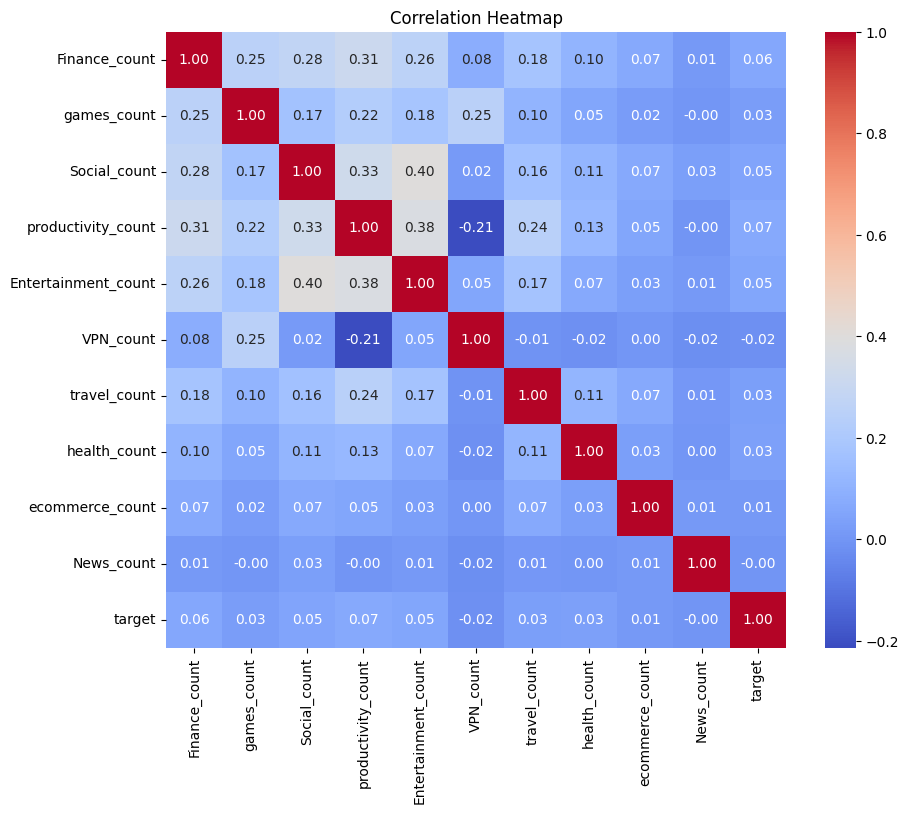

In [55]:
# df_loan_risk_merge_good = df_loan_risk_merge[df_loan_risk_merge['good_vs_bad_loans'] == 'Good loans']

df_ = df_loan_risk_merge[['Finance_count', 'games_count', 
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count','target']]

# numerical_columns = []

# df_ = df_.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


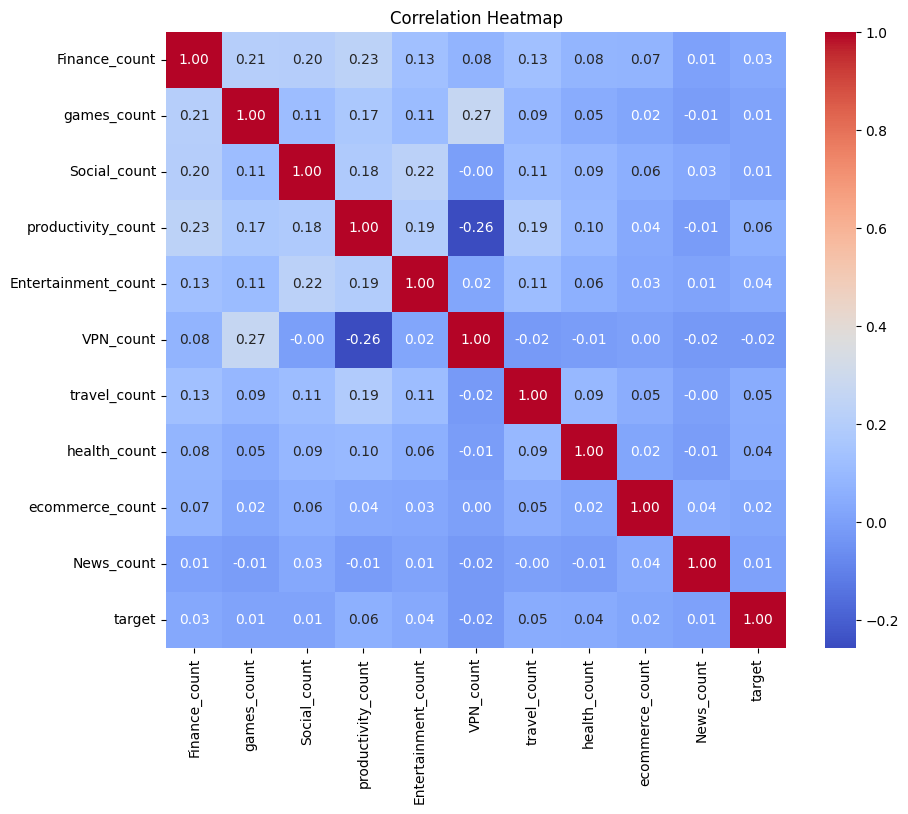

In [56]:
df_loan_risk_merge_bad = df_loan_risk_merge[df_loan_risk_merge['good_vs_bad_loans'] == 'Bad loans']

df_ = df_loan_risk_merge_bad[['Finance_count', 'games_count', 
                              
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count','target']]

# numerical_columns = []

# df_ = df_.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


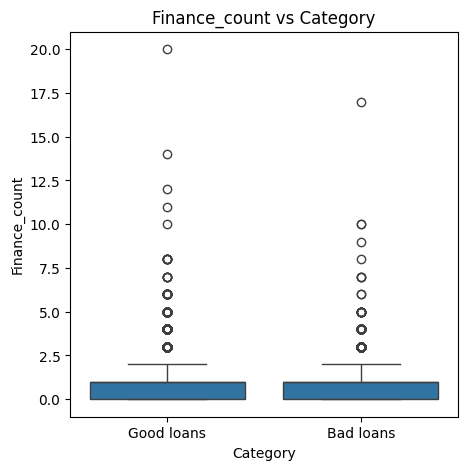

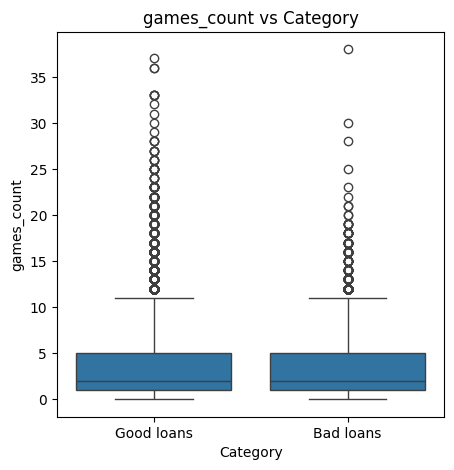

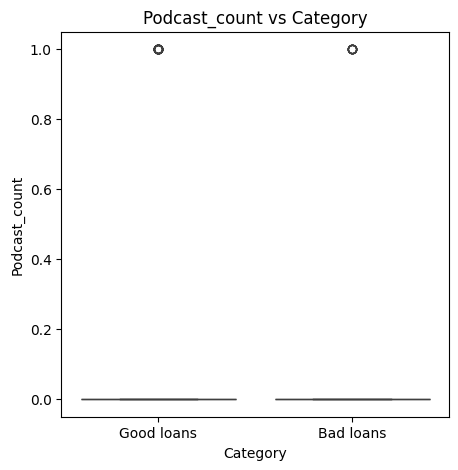

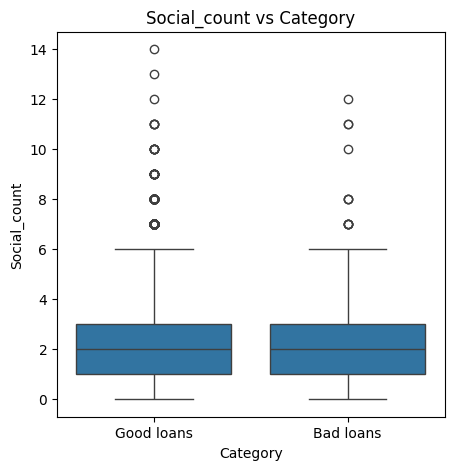

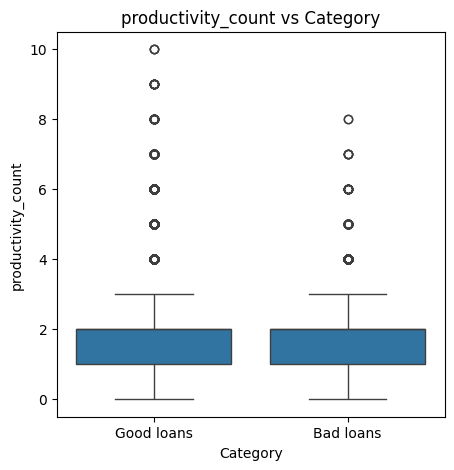

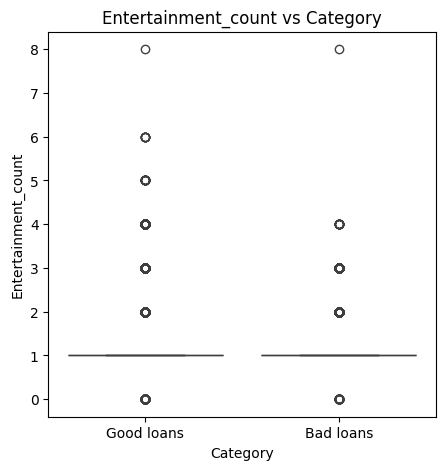

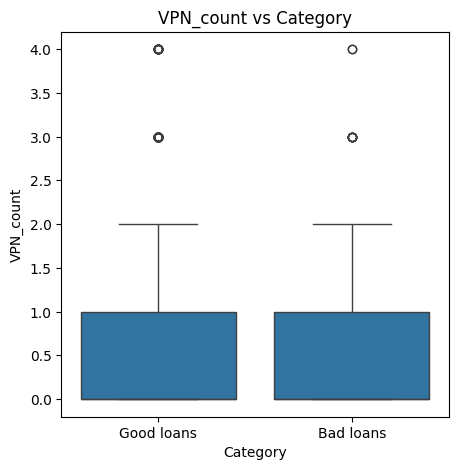

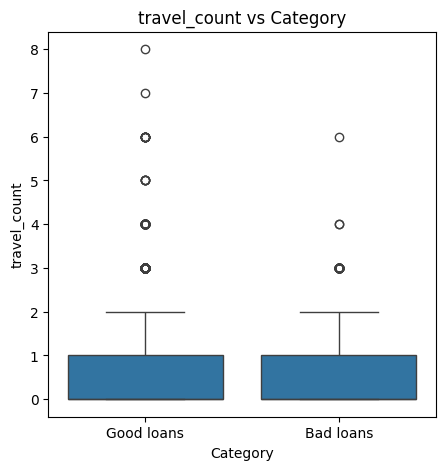

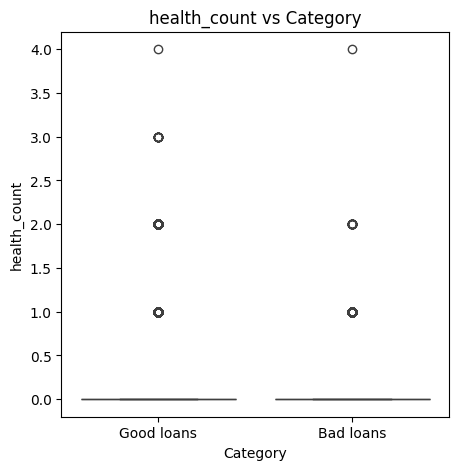

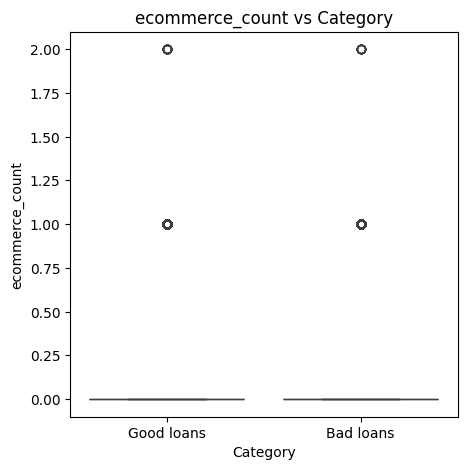

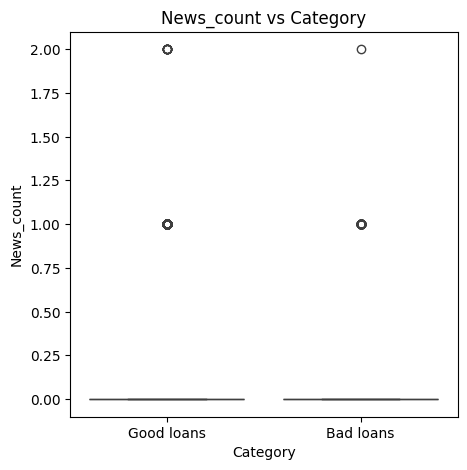

In [57]:
numerical_columns = ['Finance_count', 'games_count', 'Podcast_count',
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count']
for column in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='good_vs_bad_loans', y=column, data=df_loan_risk_merge)
    plt.xlabel('Category')
    plt.ylabel(column)
    plt.title(f'{column} vs Category')
    plt.show()

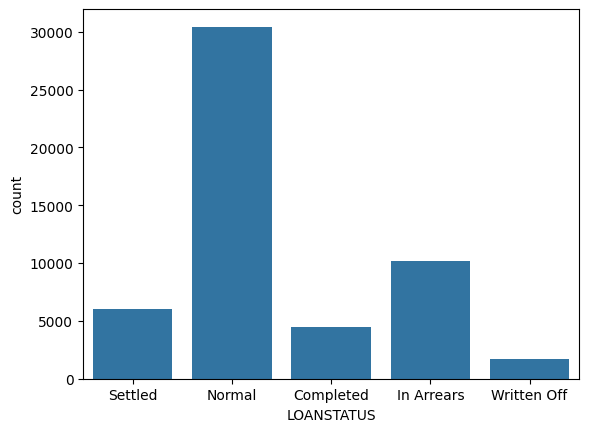

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

 
# count plot on single categorical variable
sns.countplot(x ='LOANSTATUS', data = df_loan_risk_merge)
 
# Show the plot
plt.show()

In [59]:
df_loan_risk_merge.columns

Index(['customerId', 'Finance_count', 'games_count', 'Podcast_count',
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count', 'LOANSTATUS', 'LOANSTARTDATE', 'good_vs_bad_loans',
       'target'],
      dtype='object')

In [60]:


# Assuming df is your DataFrame with columns: customer_id, financial_app_counts, social_media_app_count, 
# entertainment_app_count, game_apps_counts, and loan_status

# Define quartiles for each count variable
quartiles = df_loan_risk_merge[['Finance_count', 'games_count', 'Podcast_count',
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count']].quantile([0.25, 0.5, 0.75])

# Function to categorize count variables based on quartiles
def categorize_count(value, quartiles):
    if value <= quartiles[0.25]:
        return 'Low'
    elif value <= quartiles[0.5]:
        return 'Medium'
    elif value <= quartiles[0.75]:
        return 'High'
    else:
        return 'Very High'

# Apply categorization to each count variable
for column in ['Finance_count', 'games_count', 'Podcast_count',
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count',]:
    df_loan_risk_merge[column + '_category'] = df_loan_risk_merge[column].apply(lambda x: categorize_count(x, quartiles[column]))

# Encode loan status to numerical values
df_loan_risk_merge['loan_status_numeric'] = df_loan_risk_merge['good_vs_bad_loans'].map({'Good loans': 1, 'Bad loans': 0})


In [61]:
df_loan_risk_merge.head()

,customerId,Finance_count,games_count,Podcast_count,Social_count,productivity_count,Entertainment_count,VPN_count,travel_count,health_count,ecommerce_count,News_count,LOANSTATUS,LOANSTARTDATE,good_vs_bad_loans,target,Finance_count_category,games_count_category,Podcast_count_category,Social_count_category,productivity_count_category,Entertainment_count_category,VPN_count_category,travel_count_category,health_count_category,ecommerce_count_category,News_count_category,loan_status_numeric
0,1000192,2,6,0,2,2,3,0,2,0,0,0,Settled,2023-04-29,Good loans,3,Very High,Very High,Low,Medium,Medium,Very High,Low,Very High,Low,Low,Low,1
1,1000243,1,0,0,2,3,1,0,1,0,0,0,Normal,2023-05-24,Good loans,2,Medium,Low,Low,Medium,Very High,Low,Low,High,Low,Low,Low,1
2,1000488,2,2,0,3,2,1,0,2,1,0,0,Completed,2021-07-14,Good loans,0,Very High,Medium,Low,High,Medium,Low,Low,Very High,Very High,Low,Low,1
3,1000543,2,9,0,2,2,1,1,1,0,0,0,Completed,2023-07-16,Good loans,0,Very High,Very High,Low,Medium,Medium,Low,High,High,Low,Low,Low,1
4,1000605,3,4,0,5,4,2,2,1,0,0,0,Settled,2022-12-29,Good loans,3,Very High,High,Low,Very High,Very High,Very High,Very High,High,Low,Low,Low,1


In [62]:
df_loan_risk_merge.columns

Index(['customerId', 'Finance_count', 'games_count', 'Podcast_count',
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count', 'LOANSTATUS', 'LOANSTARTDATE', 'good_vs_bad_loans',
       'target', 'Finance_count_category', 'games_count_category',
       'Podcast_count_category', 'Social_count_category',
       'productivity_count_category', 'Entertainment_count_category',
       'VPN_count_category', 'travel_count_category', 'health_count_category',
       'ecommerce_count_category', 'News_count_category',
       'loan_status_numeric'],
      dtype='object')

In [63]:
from scipy.stats import chi2_contingency

# Create a contingency table for chi-square test
contingency_table = pd.crosstab([df_loan_risk_merge['Finance_count_category'], 
                                  df_loan_risk_merge['games_count_category'], 
                                  df_loan_risk_merge['Podcast_count_category'], 
                                  df_loan_risk_merge['Social_count_category'],
                                 df_loan_risk_merge['Entertainment_count_category'], 
                                  df_loan_risk_merge['productivity_count_category'], 
                                  df_loan_risk_merge['VPN_count_category'],
                                 df_loan_risk_merge['travel_count_category'], 
                                  df_loan_risk_merge['health_count_category'], 
                                  df_loan_risk_merge['ecommerce_count_category'], 
                                  df_loan_risk_merge['News_count_category']],df_loan_risk_merge['good_vs_bad_loans'] )

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

In [64]:
chi2_stat

4425.924606157963

In [65]:
p_val

7.857447874598955e-21

In [66]:
correlation_coefficients = df_loan_risk_merge[['Finance_count', 'games_count', 'Podcast_count',
       'Social_count', 'productivity_count', 'Entertainment_count',
       'VPN_count', 'travel_count', 'health_count', 'ecommerce_count',
       'News_count','loan_status_numeric']].corr()

# Extract correlation between loan status and count variables
loan_status_correlation = correlation_coefficients['loan_status_numeric'][:-1]

In [67]:
loan_status_correlation

Finance_count         -0.043969
games_count            0.013732
Podcast_count          0.000753
Social_count           0.020628
productivity_count     0.014843
Entertainment_count    0.043798
VPN_count              0.029641
travel_count           0.001597
health_count          -0.007416
ecommerce_count       -0.017555
News_count            -0.002414
Name: loan_status_numeric, dtype: float64

In [68]:
# strings = ['string1', 'string2', 'string3']

# Construct the WHERE clause for the SQL query
where_clause = ' OR '.join([f"ca.package_name LIKE '%{s}%'" for s in string])

# Construct the full SQL query
sql_query = f"SELECT * FROM your_table_name ca WHERE {where_clause};"

print(sql_query)

NameError: name 'string' is not defined

In [69]:
data =    {"category" :['social_media',"social_media","social_media","social_media",'social_media',"social_media",
                        "social_media",'social_media',"social_media","social_media","social_media",'social_media',
                        "social_media","social_media","social_media","social_media","ecommerce","ecommerce","ecommerce",
                       "google","google","google","google","navigation","navigation","navigation","calls","calls","calls",
                       "texting","texting","texting","texting","entertainment","entertainment","entertainment","entertainment"
                       "games",'games','games','games','games','games','games','games','games','games',
                       "finance","finance","finance","finance","finance","finance","finance","finance","finance","finance",
                       "finance","finance","finance","music","music","Inbuilt","Inbuilt","Inbuilt","Inbuilt","Inbuilt","Inbuilt","Inbuilt"
                       "photos","photos","photos","photos","photos","photos","riding","riding","mailapp","mailapp","mailapp",
                        "Others","Others","Others","Others","Others", "Others","Others","Others","Others","Others",
                         "Others","Others","Others","Others","Others",  "Others","Others","Others",
                        "finance","finance","finance","finance","finance","finance","finance","finance","finance","finance",
                        "finance","finance","finance","finance","finance","finance","finance","finance","finance","finance",
                        "games",'games','games','games','games','games','games','games','games','games',"games",'games','games','games','games','games','games','games','games','games',"games",'games','games','games','games','games','games','games','games','games',
                        "social_media","social_media","Others",
                        "travel","travel","travel","travel","travel","travel","travel","travel","travel","travel",
                        "travel","travel","travel","travel","travel","travel","travel","travel","travel","travel",
                        'social_media',"social_media","social_media","social_media",'social_media',"social_media",
                        "social_media",'social_media',"social_media",'social_media',"social_media","social_media","social_media",'social_media',"social_media",
                        "social_media",'social_media',"social_media",'social_media',"social_media","social_media","social_media",'social_media',"social_media",
                        "social_media",'social_media',"social_media", "social_media",'social_media',"social_media",
                        "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",
                       "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",
                       "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle",
                       "Health & lifestyle",  "Health & lifestyle",  "Health & lifestyle","Health & lifestyle",
                       "VPN","VPN", "VPN","VPN","VPN","VPN","VPN","VPN","VPN",'productivity','productivity','productivity','productivity',
                        'productivity','productivity','productivity','productivity','productivity','productivity','productivity',
                        'productivity','productivity','productivity','productivity','productivity','productivity','productivity','productivity',
                        'productivity','productivity','productivity','productivity','productivity','productivity',
                        "ecommerce","ecommerce","ecommerce","ecommerce",'ecommerce',"ecommerce","ecommerce","ecommerce","ecommerce",'ecommerce',
                        "ecommerce","ecommerce","ecommerce","ecommerce",'ecommerce', "ecommerce","ecommerce","ecommerce","ecommerce",'ecommerce'
                       ],
                       
          "apps" :["messanger","facebook","viber","whatsapp","tiktok","instagram","lite","facebooklite",
            "Telegram","Discord","Pinterest","bilibili","reddit","Twitter","linkedin","X","lazada","shopee","ph",
                  "google","chrome","drive","Googledrive","googlemaps","maps","offline", "phone","smartcaller","Dito",
                  "messages","chat","imo","iconpack", "Youtube","Netflix","loklok","aha", 
                  "getjar","game","games","gamecenter","battle","shooter","survival","mcpe","tycoon",
                   "Gcash","BPI","Metrobank","iWant","PayMaya","wallet","mocamoca","moca","wise","trust","mrcash",
                   "metamask","pesohere","spotify","Puretuber", "clock","calculator","Calender","notes","myfiles","files","browser"
                  "Googlephotos","Aigallery","Capcut","photoeditor","scanner","video",
                   "Angkas","grab","gmail","mail","yahoo","shareit","WPS","vivobrowser","launcher","vpn","theme","editor","reader","samsung",
                   "BDO","gp","en","skyro","plus","cleaner","bible","one","dictionary",
                   "GCash","PayMaya","Coins", "BPI","UnionBank",
                    "CIMB", "Security Bank","BDO","Metrobank","Robinsons",
                    "LANDBANK", "EastWest","PNB", "PSBank", "Maybank2U","Citibank",
                   "RCBC", "AXA", "SunLife","AUB",
                   'mobilelegends', 'freefireth', 'spacemafia', 'clashofclans', 'ig', 'shooter', 'bh3global', 'romg', 'gp', 'GenshinImpact', 'fortnite', 'n9', 'clashroyale', 'subwaysurf', 'gardenscapes', 'homescapes', 'candycrushsaga', 'eightballpool', 'mobilehero', 'common', 'legends', 'freefireth', 'spacemafia', 'clashofclans', 'ig', 'shooter', 'bh3global', 'romg', 'gp', 'GenshinImpact',
                   "tinder","wechat","telephony",
                   'Booking', 'Airbnb', 'Uber', 'Lyft', 'GoogleMaps', 'GoogleEarth', 'TripAdvisor', 'Expedia', 'com', 'KAYAK', 'Skyscanner', 'Agoda', 'Hopper', 'Trivago', 'TripIt', 'Traveloka', 'Priceline', 'Orbitz', 'Waze', 'Rome2rio',
                   'Facebook', 'Instagram', 'Twitter', 'LinkedIn', 'Snapchat', 'TikTok', 'Pinterest', 
                   'WhatsApp', 'Messenger', 'Reddit', 'YouTube', 'Tumblr', 'Telegram', 'Discord', 'Skype', 
                   'WeChat', 'LINE', 'Viber', 'Signal', 'Twitch', 'VKontakte', 'Weibo', 'Snapchat', 'Clubhouse', 
                   'Flickr', 'Quora', 'Badoo', 'Meetup', 'KakaoTalk', 'VK','MyFitnessPal', 'Calm', 'Headspace', 'Fitbit', 'NikeTrainingClub', 'LoseIt', 'Strava', 'Yoga Studio', 'DailyYoga', 'MapMyRun', '7MinuteWorkout', 'PeriodTracker', 'WaterDrinkReminder',
                     'SleepCycle', 'GoodRx', 'Zombies', 'Fooducate', 'Sweatcoin', 'Habitica',
                   "NordVPN","SurfShark", "Express","cyberghost","IPVanish","Private Internet Access",
                   "Mullvad","Proton", "Atlas",'googlecanlender','googledrive','samsungcalender','samsungnotes','openai','chatgpt','googledocs',
                'camsoftinformation','googlesheets','wps','notes','camscanner','microsoft','googlesheets','Adobe',
                'Alarm','onedrive','Notisave','calculator','notepad','pdfreader','pdf','filemanger','calender','outlook',
                   'Shopee', 'Lazada', 'Zalora', 'Zilingo', 'Amazon', 'eBay', 'AliExpress', 'Wish', 'Tokopedia', 'JD.com', 'Walmart', 'Flipkart', 'Alibaba', 'Rakuten', 'Taobao', 'Snapdeal', 'MercadoLibre', 'Daraz', 'Olx', 'Etsy'
                  ]}
                
df = pd.DataFrame(data)
df['apps'] = df['apps'].str.lower()
df = df.drop_duplicates(keep='last')
len(df)

242

In [70]:
top_social_media_apps_packages = {"a": [
    
 
    "Spotify",
    "Apple Podcasts",
    "Google Podcasts",
    "Stitcher",
    "Podbean",
    "TuneIn",
    "Pocket Casts",
    "Overcast",
    "Castbox",
    "Deezer",
    "iHeartRadio",
    "RadioPublic",
    "Acast",
    "Podcast Addict",
    "Player FM",
    "Breaker",
    "SoundCloud",
    "Anchor",
    "Audible",
    "Podyssey"


]}


df1 = pd.DataFrame(top_social_media_apps_packages)
# df1['apps'] = df1['a'].apply(extract_last_word)


In [71]:
print(df1['a'].tolist())

['Spotify', 'Apple Podcasts', 'Google Podcasts', 'Stitcher', 'Podbean', 'TuneIn', 'Pocket Casts', 'Overcast', 'Castbox', 'Deezer', 'iHeartRadio', 'RadioPublic', 'Acast', 'Podcast Addict', 'Player FM', 'Breaker', 'SoundCloud', 'Anchor', 'Audible', 'Podyssey']


In [72]:
print(len(df1))

20
